

$
    \xi \sim \text{multinomial}(n, \{\mu_1, \mu_2, \mu_3, \mu_4\}) =  \text{multinomial}(n, \mu^4)
$


$
    H_0 : \mu^4 = \{0.15 ,0.20, 0.30, 0.35\}
$

$
    H_1 : \mu^4 = \left\{\frac{0.15}{1+k}+\frac{k}{1+k} ,\frac{0.20}{1+k}, \frac{0.30}{1+k}, \frac{0.35}{1+k}\right\}
$

$
~~~~~~~\text{или}~\left\{\frac{0.15}{1+k},\frac{0.20}{1+k}+\frac{k}{1+k}, \frac{0.30}{1+k}, \frac{0.35}{1+k}\right\}
$

$
~~~~~~~\text{или}~\left\{\frac{0.15}{1+k},\frac{0.20}{1+k}, \frac{0.30}{1+k}+\frac{k}{1+k}, \frac{0.35}{1+k}\right\}
$

$
~~~~~~~\text{или}~\left\{\frac{0.15}{1+k},\frac{0.20}{1+k}, \frac{0.30}{1+k}, \frac{0.35}{1+k}+\frac{k}{1+k}\right\},~~~~k > 0
$

# four head z stat 

## 3.1


$
    Z = \left| (\frac{x_1 - \mu_1}{\mu_1\cdot(1-\mu_1) \cdot n}) \cdot \sqrt{n} \right| +
     \left| (\frac{x_2 - \mu_2}{\mu_2\cdot(2-\mu_2) \cdot n}) \cdot \sqrt{n} \right| + 
      \left| (\frac{x_3 - \mu_3}{\mu_3\cdot(3-\mu_3) \cdot n}) \cdot \sqrt{n} \right| + 
       \left| (\frac{x_4 - \mu_4}{\mu_4\cdot(4-\mu_4) \cdot n}) \cdot \sqrt{n} \right|
$

In [172]:
from scipy.stats import multinomial
import matplotlib.pyplot as plt
import numpy as np

In [181]:
def four_head_z_stat(rv):
    p=[0.15, 0.20, 0.30, 0.35]
    n = sum(rv)
    var0 = p[0]*(1-p[0])*n
    var1 = p[1]*(1-p[1])*n
    var2 = p[2]*(1-p[2])*n
    var3 = p[3]*(1-p[3])*n
    a = rv[0] 
    b = rv[1] 
    c = rv[2] 
    d = rv[3] 
    mean0 = n * p[0]
    mean1 = n * p[1]
    mean2 = n * p[2]
    mean3 = n * p[3]
    return (abs(a-mean0)/(var0)*np.sqrt(n) + abs(b-mean1)/(var1)*np.sqrt(n) 
            +abs(c-mean2)/(var2)*np.sqrt(n) +abs(d-mean3)/(var3)*np.sqrt(n))

In [182]:
def get_right_critical(alpha):
    z_sample_distribution_H0 = [
    four_head_z_stat(rv) for rv in multinomial.rvs(n = 100, p= [0.15, 0.20, 0.30, 0.35], size=100000)]
    right_critical = np.percentile(a=z_sample_distribution_H0, q=100 * (1 - alpha))
    print(f"Right critical value: {right_critical}")
    return right_critical

In [185]:
def four_head_z_stat_test(sample_rv, right_critical):      
    z = four_head_z_stat(sample_rv)
    if z >= right_critical:
        return 1 # отклоняем H0, принимаем H1
    else:
        return 0 # не отклоняем H0

In [186]:
sample_rv = multinomial.rvs(n=100, p=[0.15, 0.20, 0.30, 0.35], size=1)[0]
alpha = 0.05
right_critical = get_right_critical(alpha)
if four_head_z_stat_test(sample_rv, right_critical):
            print("Reject the null hypothesis")
else:
            print("Do not reject the null hypothesis")

Right critical value: 13.545706744236156
Do not reject the null hypothesis


In [187]:
k = 0.25
sample_rv = multinomial.rvs(n=100, p=[0.10/(k+1), 0.30/(k+1) + k/(k+1), 
                                      0.25/(k+1), 0.35/(k+1)], size=1)[0]
if four_head_z_stat_test(sample_rv, right_critical):
            print("Reject the null hypothesis")
else:
            print("Do not reject the null hypothesis")

Reject the null hypothesis


## 3.2

In [ ]:
def get_stat_power(k, right_critical_value, n_of_provider = 1, size_of_sample = 2000):
    if n_of_provider == 1:
        p_ = [0.15/(k+1) + k/(k+1), 0.20/(k+1), 0.30/(k+1), 0.35/(k+1)]
    elif n_of_provider == 2:
        p_ = [0.15/(k+1), 0.20/(k+1) + k/(k+1), 0.30/(k+1), 0.35/(k+1)]
    elif n_of_provider == 3:
        p_ = [0.15/(k+1), 0.20/(k+1), 0.3/(k+1) + k/(k+1), 0.35/(k+1)]
    elif n_of_provider == 4:
        p_ = [0.15/(k+1), 0.20/(k+1) , 0.3/(k+1), 0.35/(k+1)+ k/(k+1)]    
    z_sample_distribution = [four_head_z_stat(rv) for rv in multinomial.rvs(n = 100, p= p_, size=size_of_sample)]
    b = len([rv for rv in  z_sample_distribution if rv < right_critical_value])/size_of_sample
    return 1 - b

In [188]:
powers = []
k_ = np.arange(0, 0.5, 0.05)
for k in k_:
    powers.append(get_stat_power(k, right_critical))

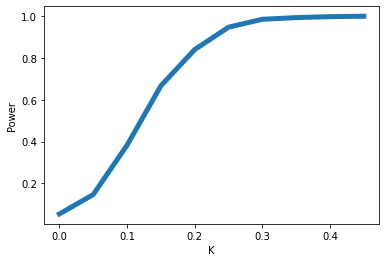

In [189]:
plt.plot(k_, powers, linewidth=5.0)
plt.ylabel('Power')
plt.xlabel('K')
plt.show()

fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(x, y)
axs[1].plot(x, -y)

## 3.3

In [196]:
powers = []
k_ = np.arange(0, 0.5, 0.05)
for i, n_of_prov in enumerate(range(1, 5)):
    powers.append([])
    for k in k_:
        powers[i].append(get_stat_power(k, right_critical,  n_of_prov))

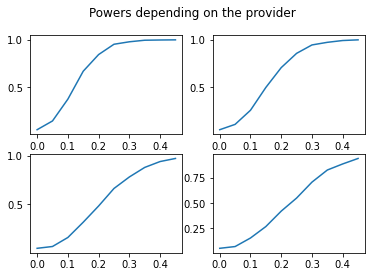

In [198]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Powers depending on the provider')
ax1.plot(k_, powers[0])
ax2.plot(k_, powers[1])
ax3.plot(k_, powers[2])
ax4.plot(k_, powers[3])

In [219]:
print(f"The value of power for different providers, k = 0.2: {powers[0][3]}, {powers[1][3]}, {powers[2][3]}, {powers[3][3]}")

The value of power for different providers, k = 0.2: 0.6685, 0.497, 0.31899999999999995, 0.26549999999999996


По графику можем сделать вывод о том, что четвертого провайдера поставщику лучше выбрать для своего жульничества, так как для него получается наименьшая мощность. 